In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# Geospatial Basics

In this notebook we'll look at using geospatial data, or data that contains some geographic information. 

## Geopandas

Geopandas is a library that extends the popular Pandas library to allow for easy manipulation of geospatial data. It mostly works like a regular dataframe, with the exception of having more geospatial functionality. We can make geo dataframes from spatial specific data types like shapefiles, or from regular dataframes with columns that contain geospatial data.

<b>Note:</b> you might need to install geopandas. This can cause issues with dependencies, so I'd recommend copying the environment then installing it there. The command to copy the environment is `conda create --name new_env_name --clone old_env_name`, then the command to active that environment is `conda activate new_env_name`. Once you're in the new environment you can install geopandas with `conda install -c conda-forge geopandas`. This isn't required, but if there's some weird issue, this can save you some headaches. 

### Geo Dataframes

Geo dataframes are just like regular dataframes, but with a little additional functionality to make them geospatial friendly. The most prevelant difference is the 'geometry' column, which is a specially labeled column that contains the geospatial data. For example, if we have a dataframe of cities, the geometry column would contain the latitude and longitude of the city, if we have a dataframe of countries, the geometry column would contain the shape of the country, etc...

We can generally read csv data into a pandas dataframe then make it into a geodataframe by specifying the geometry column, we can also read the data directly into a geodataframe. Pandas gives us a bit more power and flexibility in manipulating and reading different types of data, so if we have lots of work to do it might be easier to start with a pandas dataframe then convert it to a geodataframe. In the end, it doesn't matter, we just need the data prepared. 

### Processing Data and Encoding Geospatial Data

Geospatial data, like the values we get in our 'geometry' column, can be encoded in a few different ways. The most common are WKT (Well Known Text), WKB (Well Known Binary), and GeoJSON. These are all ways to represent the same data, but in different formats. We can convert between these formats using the `shapely` library, which is a dependency of geopandas.

We don't really worry about this much here. If you're processing large amounts of geopspatial data you may need to deal with this, but for the most part we can just use the geopandas functions to do the work for us.

In [2]:
#schools = gpd.read_file('../data/Schools.csv')
schools = pd.read_csv('../data/Schools.csv')
booze = gpd.read_file('../data/Alcohol_Sales_Licences.csv')
hoods = gpd.read_file('../data/Neighbourhood_Boundaries.csv')

In [3]:
schools.head()

,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,Sch_Type,Grades,Sch_Addres,Sch_City,Sch_Postal,School_Web,School_EMa,School_Pho,Latitude,Longitude,Sector,epsb_ward,max_year,Catchment Polygon
0,2021,NaN,NaN,7050.0,50.0,Vimy Ridge Academy,JS,Gr 7-12,8205 - 90 Avenue NW,Edmonton,T6C1N8,http://vimyridge.epsb.ca,vimyridge@epsb.ca,(780) 465-5461,-113.452704,53.524095,South Central,EPSB WARD G,True,NaN
1,2021,NaN,NaN,7186.0,186.0,Malmo,EL,K to Gr 6,4716 - 115 Street NW,Edmonton,T6H3N8,http://malmo.epsb.ca,malmo@epsb.ca,(780) 434-1362,-113.529200,53.485223,South Central,EPSB WARD F,True,NaN
2,2021,NaN,NaN,7090.0,90.0,Metro Continuing Ed.,SP,NaN,8205 - 90 Avenue NW,Edmonton,T6C1N8,NaN,NaN,NaN,0.000000,0.000000,South Central,EPSB WARD G,True,NaN
3,2021,NaN,NaN,7150.0,150.0,Mill Creek,EL,K to Gr 6,9735 - 80 Avenue NW,Edmonton,T6E1S8,http://millcreek.epsb.ca,millcreek@epsb.ca,(780) 433-5746,-113.481284,53.515433,South Central,EPSB WARD G,True,NaN
4,2021,NaN,NaN,7524.0,152.0,Mount Pleasant,EL,K to Gr 6,10541 - 60A Avenue NW,Edmonton,T6H1K4,http://mountpleasant.epsb.ca,mpleasant@epsb.ca,(780) 434-6766,-113.503936,53.495896,South Central,EPSB WARD F,True,NaN


### Plotting Geo Dataframes

Plotting geo dataframes is pretty easy, we can just use the plot() function call in most cases - this will plot the geometry column of the dataframe. 

The plotting tools are based on the matplotlib library, which is the basis of many visualization libraries such as seaborn. The details of controlling matplotlib plots can be a bit annoying and inconvenient, but we can ultimately do almost anything we want with the plots. For normal uses, we can stick to the defaults, or slight variations; for presentation purposes, we might want to spice it up a bit. 

#### Styling Plots

The maps that we get are functional, but definitely less pretty than what we get with fancy modern tools like Google Maps. We don't have a direct way to make things pretty, but we can use some things like color, transparency, marker style, and size to make the plots more visually appealing. 

<b>Note:</b> there are a few examples of me making new points from latitude and longitude instead of using the existing points. This is part for demonstration, and part because the existing ones gave a few errors and I didn't want to spend too much time figuring out why. It is almost certainly due to some difference such as the encoding system (more on this later), but it isn't a big deal. 

<Axes: >

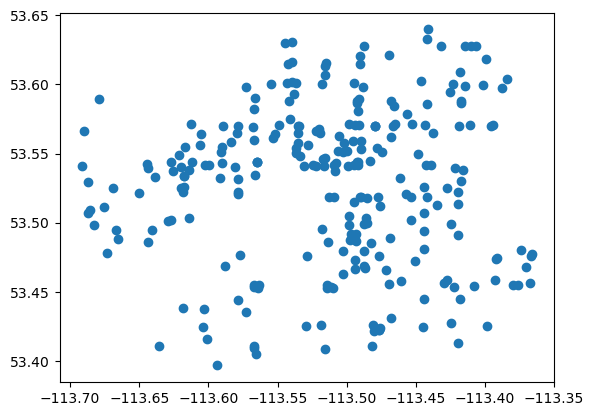

In [4]:
booze.head()
booze['geometry'] = gpd.points_from_xy(booze['Longitude'], booze['Latitude'])
booze.set_geometry('geometry', inplace=True)
booze.plot()

#### Add A Basemap

We can add a basemap to our plots to make them look more like a real map. 

<b>Note:</b> the from_wkt function is something that is commonly used, and rarely thought about. It is a function that converts a WKT string into a shapely object, which is what our geometry column is. This command basically just translates, there are a few equivalents if the data is in a different format.

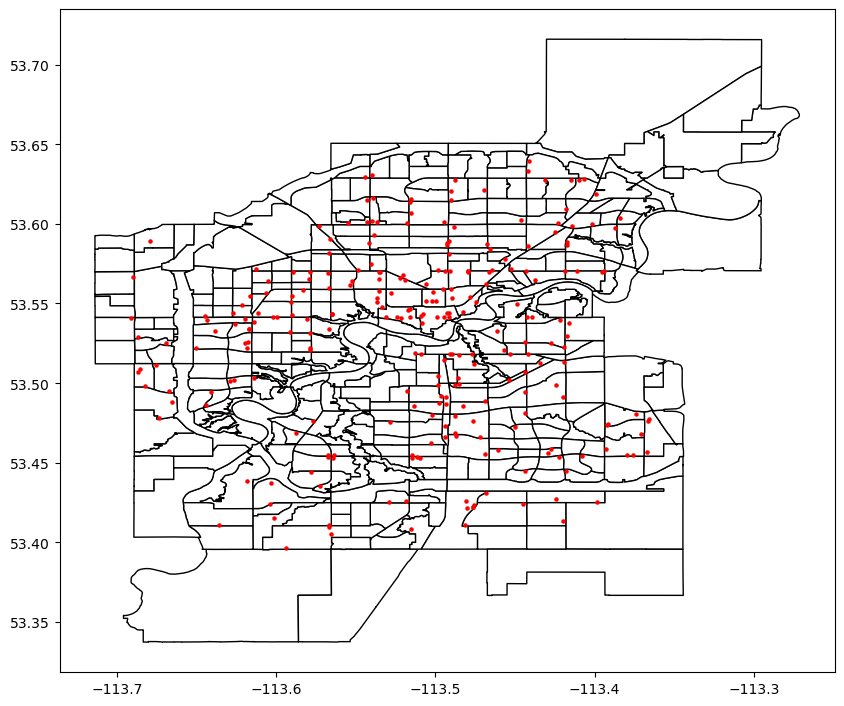

In [5]:
hoods['geometry'] = gpd.GeoSeries.from_wkt(hoods['geom'])
plot1 = hoods.plot( figsize=(10, 10), color='white', edgecolor='black')
plot2 = booze.plot(ax=plot1, color='red', markersize=5)

### Data Cleanup

There are a few things that we need to do to clean up the schools data, in particular, there appear to be some columns where the latitude and longitude are flipped. We'll need to fix this before we can plot the data, or we'll have things in the wrong place on the map!

In [6]:
schools['Latitude'] = schools['Latitude'].astype(float)
schools['Longitude'] = schools['Longitude'].astype(float)

In [7]:
def latLongFlipper(row):
    tmpRow = row
    lat = row['Latitude']
    long = row['Longitude']
    if lat < 0:
        tmpRow['Latitude'] = long
        tmpRow['Longitude'] = lat
    elif long > 0:
        tmpRow['Latitude'] = long
        tmpRow['Longitude'] = lat
    return tmpRow

In [8]:
schools = schools.apply(latLongFlipper, axis=1)

<Axes: >

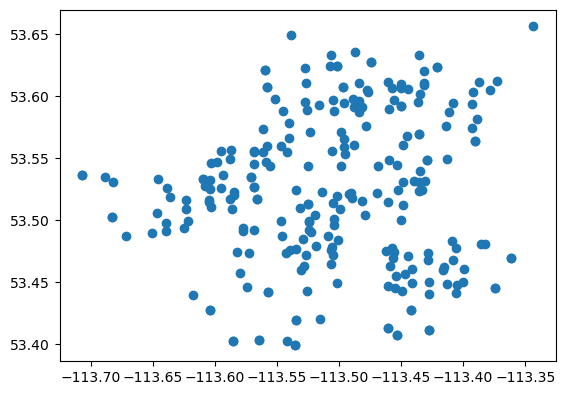

In [9]:

schools = schools[schools['Latitude'] > 50]
schools['school_location'] = gpd.points_from_xy(schools['Longitude'], schools['Latitude'])
schools = gpd.GeoDataFrame(schools, geometry='school_location')
schools.plot()

### With a Background

We can also layer on our points along with a background of neighborhoods, or in this case, the school catchment areas. In fact, we can layer as much data as we want, as long as the end result is still readable.

<Axes: >

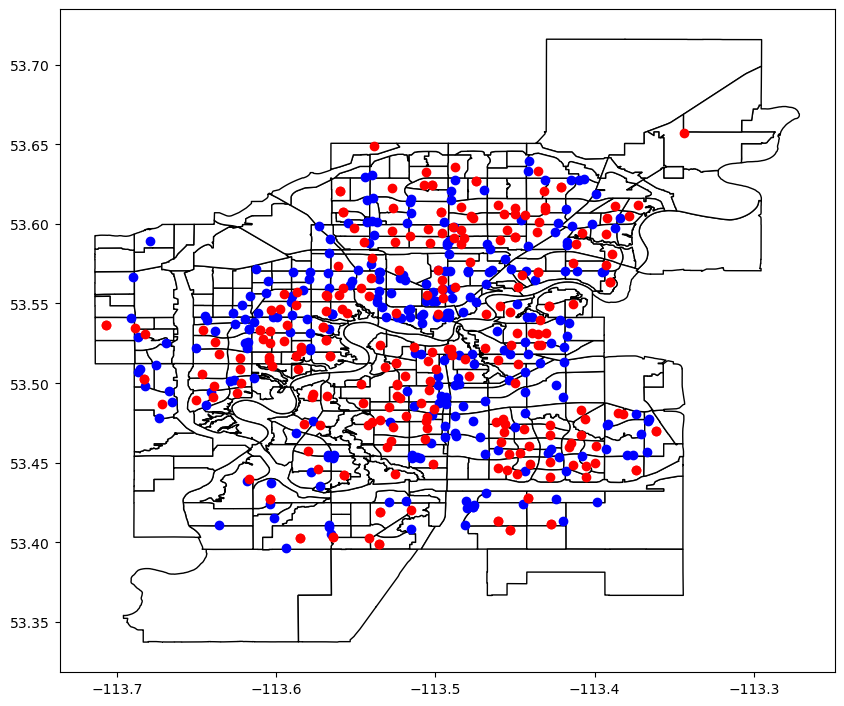

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
#schools.plot(ax=fig, color='red')
hoods.plot(ax=ax, color='white', edgecolor='black')
booze.plot(ax=ax, color='blue')
schools.plot(ax=ax, color='red')

#### Filling Areas

We can fill areas with color to show different regions, or to show different values. This can be useful for showing things like population density, or average income, or any other value that varies by region. This is pretty easy to do, we just need to specify the column that we want to use to color the regions in the 'column' parameter of the plot() function. If we pick a numerical value it'll scale the color according to the value, if we pick a categorical value it'll assign a color to each category like a regular political map. 

In [52]:
booze.head()

,Name,Business Description,Category,Zoning,Address,Neighbourhood ID,Latitude,Longitude,Point,geometry
0,CROMDALE LIQUOR STORE,Alcohol Sales,Alcohol Sales (Consumption Off Premises),"RA7, CB2",11723 - 82 STREET NW,1160,53.56965444785372,-113.4663962,POINT (-113.466396197168 53.569654447854),POINT (-113.46640 53.56965)
1,G & R LIQUOR MART,,Alcohol Sales (Consumption Off Premises),CMU,9906 - 109 STREET NW,1090,53.537570925020994,-113.5087635,POINT (-113.508763462947 53.537570925021),POINT (-113.50876 53.53757)
2,ACE LIQUOR DISCOUNTER AT SUMMERSIDE,Liquor Store,Alcohol Sales (Consumption Off Premises),CSC,1124 - 91 STREET SW,6214,53.42368025,-113.4755922,POINT (-113.475592152867 53.423680250415),POINT (-113.47559 53.42368)
3,SAFEWAY WINE & SPIRITS,Retail Liquor Store,"Alcohol Sales (Consumption Off Premises), Mino...",CSC,12807 - 140 AVENUE NW,3340,53.60105688,-113.5429659,POINT (-113.542965892923 53.601056880845),POINT (-113.54297 53.60106)
4,ACE LIQUOR DISCOUNTER AT FOREST HEIGHTS,Liquor Store,Alcohol Sales (Consumption Off Premises),DC2,7842 - 106 AVENUE NW,6230,53.54963823458446,-113.4488054,POINT (-113.448805403741 53.549638234584),POINT (-113.44881 53.54964)


<b>Note:</b> I left the warning for the CRS mismatch here. 

/Users/akeem/anaconda3/envs/ml_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/p1/m8wtcgx57417hx9d_r110ctw0000gn/T/ipykernel_58231/3589934450.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:6933
Right CRS: None

  tmp = gpd.sjoin(hoods, booze, how="left", op='contains')


<Axes: >

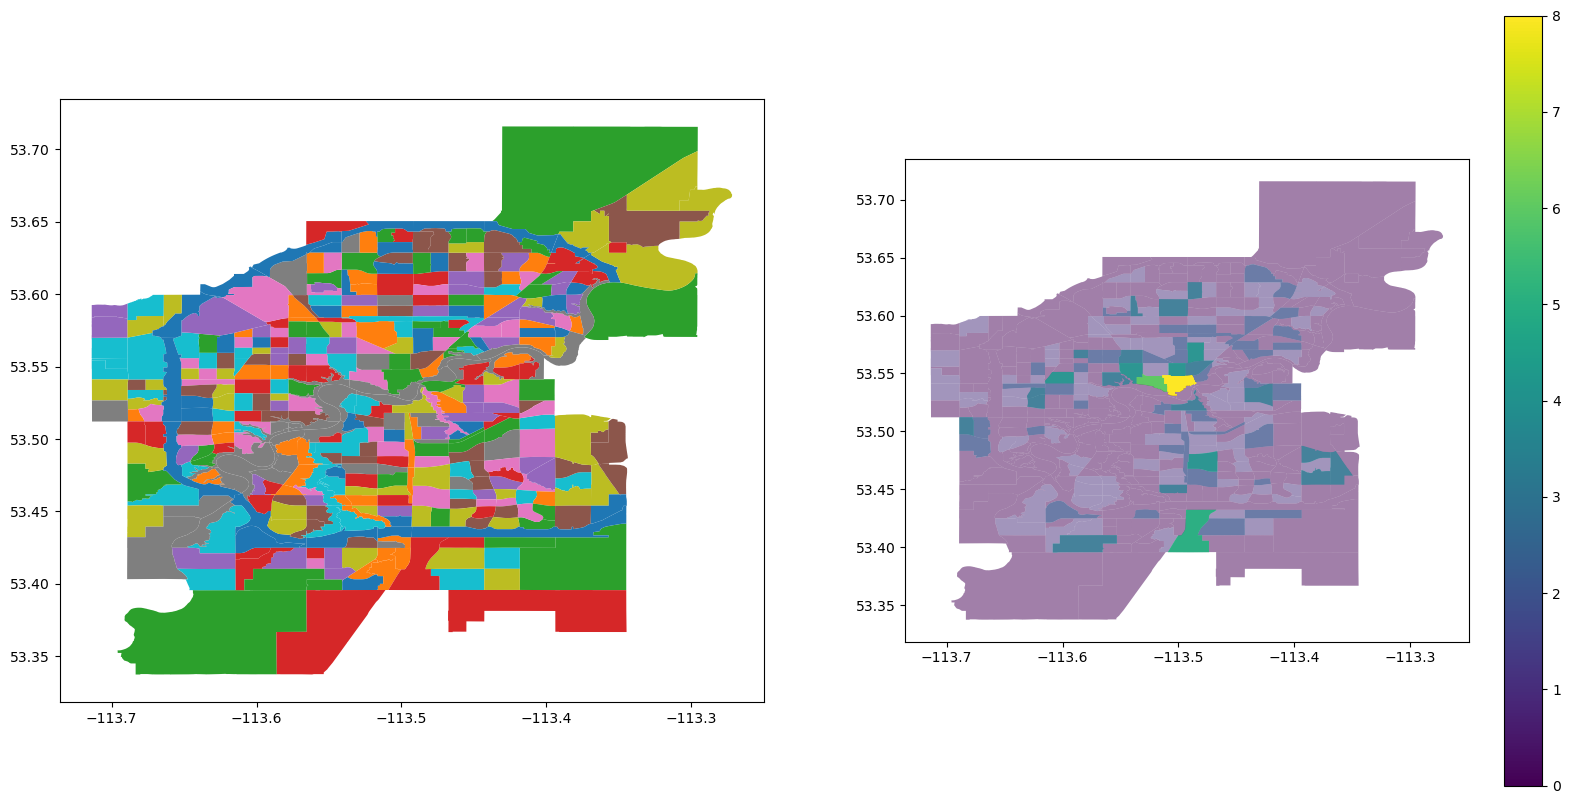

In [54]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
hoods.plot(ax=ax[0], column="Friendly Name")

tmp = gpd.sjoin(hoods, booze, how="left", op='contains')
tmp["stores_in_hood"] = tmp.groupby('Friendly Name')['Name'].transform('count')
tmp.plot(ax=ax[1], column="stores_in_hood", legend=True, alpha=0.5)

## All Together

We can map all of this stuff together, in general, we can layer as much information on a map as we want, or as much as looks clear and presentable. 

In [27]:

schools_catch = schools.copy()

from shapely import wkt

geom = []

for g in schools_catch["Catchment Polygon"]:
    try:
        geom.append(wkt.loads(g))
    except:
        geom.append(None)

schools_catch['geometry'] = geom
schools_catch = gpd.GeoDataFrame(schools_catch, geometry='geometry')


<Axes: >

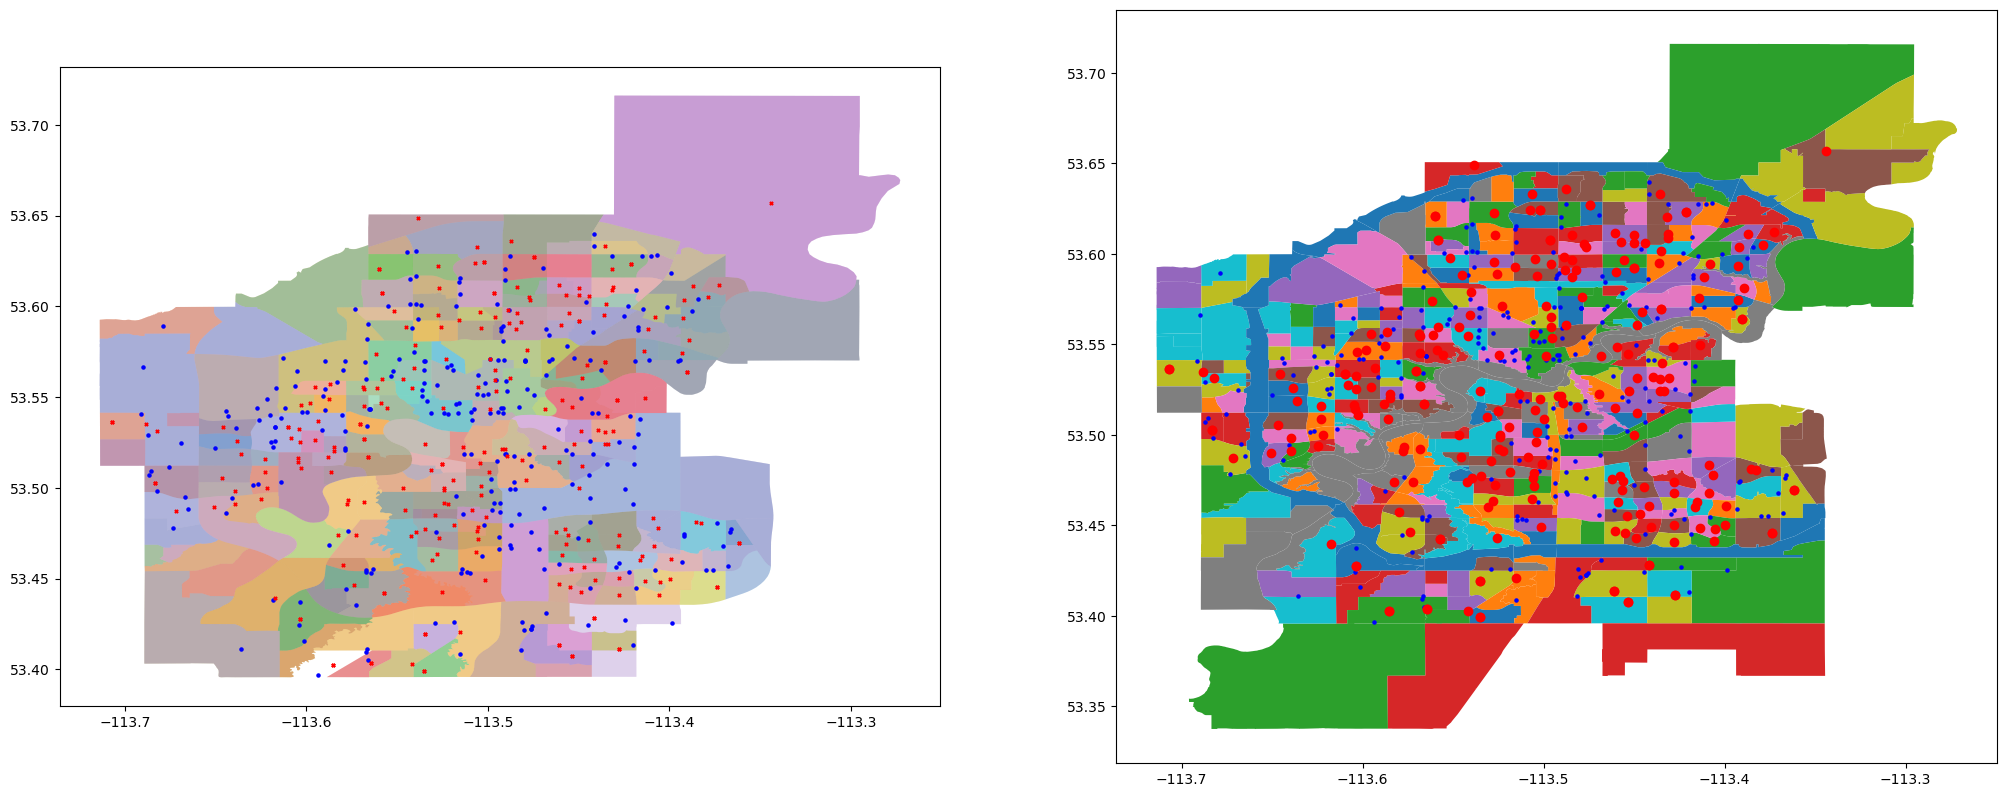

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(25, 15))

schools_catch.plot(ax=ax[0], column='School_Nam', legend=False, alpha=0.3)
hoods.plot(ax=ax[1], column="Friendly Name")

booze.plot(ax=ax[0], color='blue', markersize=5, marker='o')
schools.plot(ax=ax[0], color='red', marker = 'x', markersize=5)

booze.plot(ax=ax[1], color='blue', markersize=5)
schools.plot(ax=ax[1], color='red')

## Exercise - Map Some Stuff

Use the data provided to make some multi-layered maps. Mix it up a bit. 

In [ ]:
#

## Geospatial Joins

One of the big things that spatial data allows us to do is to join data based on location, or a spatial join. This is something that is kind of intuitive - rather than using a key value being equal to join two dataframes, we can use the location of the data to join two dataframes. This is useful when we have data that is not easily joinable by a key value, but is joinable by location.

The spatial join looks for literal intersection as if we were to plot the things, and then look at their overlap. If they overlap, then they are joined. In this case, if a point is within the bounds of a neighborhood, then we've joined. By default, the joins are built on the geometry column, but we can specify a different column if we want.

For example, we can add neighborhood data to our schools or booze lists by joining them based on the location of the school or bar.

In [29]:
schools_with_hood = gpd.sjoin(schools_catch, hoods, how='inner', op='intersects')
schools_with_hood.sample(10)

/Users/akeem/anaconda3/envs/ml_env/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,Sch_Type,Grades,Sch_Addres,Sch_City,...,epsb_ward,max_year,Catchment Polygon,school_location,geometry,index_right,Neighbourhood Number,Friendly Name,Description,geom
77,2021,59,Harry Ainlay,7059.0,59.0,Harry Ainlay,SR,Gr 10-12,4350 - 111 Street NW,Edmonton,...,EPSB WARD F,True,MULTIPOLYGON (((-113.50710086337476 53.4896130...,POINT (-113.51862 53.47924),"MULTIPOLYGON (((-113.50710 53.48961, -113.5070...",48,5220,Greenfield,"This area was named for Herbert Greenfield, le...",MULTIPOLYGON (((-113.53484406207166 53.4674625...
251,2021,561,Edith Rogers,7561.0,561.0,Edith Rogers,JR,Gr 7-9,8308 Millwoods Road NW,Edmonton,...,EPSB WARD G,True,MULTIPOLYGON (((-113.41932530289779 53.4667345...,POINT (-113.45607 53.47419),"MULTIPOLYGON (((-113.41933 53.46673, -113.4203...",228,6760,Tweddle Place,Tweedle Place was named in honour of Malcolm T...,MULTIPOLYGON (((-113.4664666898483 53.48283958...
250,2021,557,Vernon Barford,7557.0,557.0,Vernon Barford,JR,Gr 7-9,32 Fairway Drive NW,Edmonton,...,EPSB WARD F,True,MULTIPOLYGON (((-113.51649921264715 53.4757810...,POINT (-113.54232 53.47359),"MULTIPOLYGON (((-113.51650 53.47578, -113.5163...",80,5070,Blue Quill Estates,Named to honour Chief Blue Quill of the Saddle...,MULTIPOLYGON (((-113.544852359899 53.461301568...
245,2021,279,George H Luck,7279.0,279.0,George H. Luck,EL,K to Gr 6,300 Bulyea Road NW,Edmonton,...,EPSB WARD F,True,MULTIPOLYGON (((-113.57335143061046 53.4251496...,POINT (-113.57237 53.47379),"MULTIPOLYGON (((-113.57335 53.42515, -113.5706...",233,5578,Glenridding Heights,,MULTIPOLYGON (((-113.61464095677498 53.4212612...
190,2021,269,Lymburn,7269.0,269.0,Lymburn,EL,K to Gr 6,18710 - 72 Avenue NW,Edmonton,...,EPSB WARD E,True,MULTIPOLYGON (((-113.62994443902247 53.5121492...,POINT (-113.64670 53.50560),"MULTIPOLYGON (((-113.62994 53.51215, -113.6302...",49,4070,Callingwood North,The majority of dwellings in Callingwood North...,MULTIPOLYGON (((-113.61544654771735 53.5046721...
156,2021,191,Northmount,7191.0,191.0,Northmount,EL,K to Gr 6,14020 - 88A Street NW,Edmonton,...,EPSB WARD A,True,MULTIPOLYGON (((-113.46743503209727 53.6068770...,POINT (-113.47673 53.60360),"MULTIPOLYGON (((-113.46744 53.60688, -113.4674...",356,2463,Crystallina Nera West,,MULTIPOLYGON (((-113.46533303778364 53.6445116...
178,2021,63,M E LaZerte,7063.0,63.0,M.E. LaZerte,SR,Gr 10-12,6804 - 144 Avenue NW,Edmonton,...,EPSB WARD B,True,MULTIPOLYGON (((-113.29549508008058 53.6723146...,POINT (-113.44406 53.60575),"MULTIPOLYGON (((-113.29550 53.67231, -113.2955...",210,1130,Elmwood Park,Elmwood Park is a compact neighbourhood of sin...,MULTIPOLYGON (((-113.45815100008677 53.5777176...
200,2021,521,John A McDougall,7521.0,521.0,John A. McDougall,EL,K to Gr 6,10930 - 107 Street NW,Edmonton,...,EPSB WARD C,True,MULTIPOLYGON (((-113.49179784250984 53.5657675...,POINT (-113.50548 53.55553),"MULTIPOLYGON (((-113.49180 53.56577, -113.4917...",352,1140,McCauley,"McCauley, named in honour of Edmonton's first ...",MULTIPOLYGON (((-113.48784835430415 53.5480711...
100,2021,935,Roberta MacAdams,1935.0,935.0,Roberta MacAdams,EL,K to Gr 6,2099 Blackmud Creek Drive SW,Edmonton,...,EPSB WARD H,True,MULTIPOLYGON (((-113.49310866890775 53.4248194...,POINT (-113.51538 53.42062),"MULTIPOLYGON (((-113.49311 53.42482, -113.4931...",373,5466,Cashman,,MULTIPOLYGON (((-113.50217397052401 53.4103754...
139,2021,241,Steinhauer,7241.0,241.0,Steinhauer,EL,K to Gr 6,10717 - 32A Avenue NW,Edmonton,...,EPSB WARD F,True,MULTIPOLYGON (((-113.54097730108539 53.4322425...,POINT (-113.50635 53.46466),"MULTIPOLYGON (((-113.54098 53.43224, -113.5409...",213,5469,Paisley,,MULTIPOLYGON (((-113.55315365259187 53.4149773...


For the most direct result, now we know the neighborhood of every school. 

In [30]:
schools_with_hood.value_counts("Friendly Name")

Friendly Name
Anthony Henday South West      19
Anthony Henday Terwillegar     18
Whitemud Creek Ravine South    16
River Valley Mayfair           16
Anthony Henday South East      16
                               ..
Marquis                         3
Henderson Estates               2
Blackburne                      2
Davies Industrial West          2
Charlesworth                    1
Length: 399, dtype: int64

And if we map the results, let's limit it to one part of the city to make it more clear.

<Axes: >

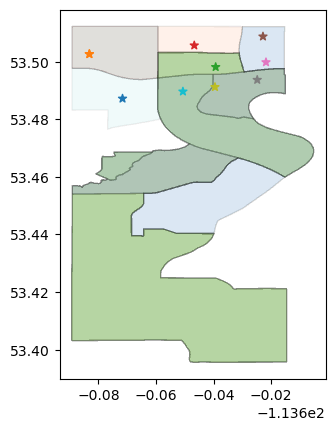

In [31]:

tmp_schools = schools_with_hood[schools_with_hood["Sector"] == "West"]
ax, fig = plt.subplots()
t1 = tmp_schools.plot(ax=fig, column='Catchment Polygon', legend=False, alpha=0.01, edgecolor='black')
schools[schools["Sector"] == "West"].plot(ax=t1, column='school_location', marker="*")


### Overlapping Areas in Joins

Another thing we can do with a join is based on areas, such as overlap. 

We can try to do a join based on overlap of the neighborhoods and the school catchment areas. 

In [32]:
hoods_with_schools = gpd.overlay(hoods[hoods["Friendly Name"]=="Crestwood"], schools_with_hood, how='intersection')
hoods_with_schools.head()

,Neighbourhood Number_1,Friendly Name_1,Description_1,geom_1,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,...,epsb_ward,max_year,Catchment Polygon,school_location,index_right,Neighbourhood Number_2,Friendly Name_2,Description_2,geom_2,geometry
0,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,53,Ross Sheppard,7053.0,53.0,Ross Sheppard,...,EPSB WARD C,True,MULTIPOLYGON (((-113.67690972340294 53.4592798...,POINT (-113.55808 53.55970),2,1170,Prince Rupert,Prince Rupert lies within the old Hudson Bay C...,MULTIPOLYGON (((-113.51740826792107 53.5646264...,"POLYGON ((-113.56563 53.53795, -113.56558 53.5..."
1,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,126,Glenora,7126.0,126.0,Glenora,...,EPSB WARD C,True,MULTIPOLYGON (((-113.5375491349441 53.53850847...,POINT (-113.55548 53.54394),13,3310,North Glenora,North Glenora was part of a 900-acre farm owne...,MULTIPOLYGON (((-113.5497969638026 53.55097874...,"POLYGON ((-113.55582 53.53741, -113.55584 53.5..."
2,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,53,Ross Sheppard,7053.0,53.0,Ross Sheppard,...,EPSB WARD C,True,MULTIPOLYGON (((-113.67690972340294 53.4592798...,POINT (-113.55808 53.55970),13,3310,North Glenora,North Glenora was part of a 900-acre farm owne...,MULTIPOLYGON (((-113.5497969638026 53.55097874...,"POLYGON ((-113.56563 53.53795, -113.56558 53.5..."
3,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,543,Westminster,7543.0,543.0,Westminster,...,EPSB WARD C,True,MULTIPOLYGON (((-113.5504448143764 53.55217891...,POINT (-113.55890 53.54653),13,3310,North Glenora,North Glenora was part of a 900-acre farm owne...,MULTIPOLYGON (((-113.5497969638026 53.55097874...,"POLYGON ((-113.55582 53.53741, -113.55584 53.5..."
4,3140,Crestwood,Crestwood's unique street pattern provides exc...,MULTIPOLYGON (((-113.56750110385832 53.5385992...,2021,53,Ross Sheppard,7053.0,53.0,Ross Sheppard,...,EPSB WARD C,True,MULTIPOLYGON (((-113.67690972340294 53.4592798...,POINT (-113.55808 53.55970),18,3450,Woodcroft,"Woodcroft contains Westmount Shopping Centre, ...",MULTIPOLYGON (((-113.56570359212803 53.5690892...,"POLYGON ((-113.56563 53.53795, -113.56558 53.5..."


This result is a set of the schools with catchment area that overlap with the neighborhood of Crestwood. This is determined by plotting and finding overlap of the two areas.

<Axes: >

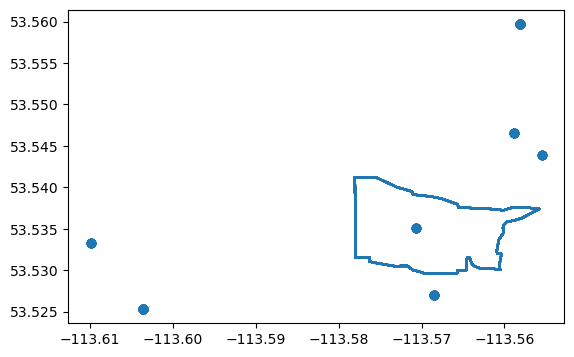

In [33]:
base_hood = hoods_with_schools.boundary.plot()
hoods_with_schools["school_location"].plot( zorder=1, ax=base_hood)

## Calculating Areas

Geospatial polygons know how big they are, we can get it in the area attribute. 

### CRS Projections

The CRS thing will impact us directly if we try to calculate anything. This is for the same basic reason that we have different projections on a map - the earth is round and the xy plane we use is flat. In short, we need to select a projection that is appropriate for the area we are working in. This is vague and confusing, but we can generally just use the default projection or look it up. For this one, I looked it up and 6933 is one that will give us results in meters, rather than degrees, like most projections.

<b>Note:</b> this projection bit is something that you'll figure out for your dataset once, and then you'll be good. We don't really worry about it much, and the details are out of scope. 

In [35]:
# convert CRS to equal-area projection
# the length unit is now `meter`
hoods.set_crs(epsg=6933, inplace=True)

,Neighbourhood Number,Friendly Name,Description,geom,geometry
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...",MULTIPOLYGON (((-113.47970029870794 53.6152271...,"MULTIPOLYGON (((-113.480 53.615, -113.476 53.6..."
1,2580,Northmount,Residential land accounts for almost 70 percen...,MULTIPOLYGON (((-113.48510468465751 53.6063060...,"MULTIPOLYGON (((-113.485 53.606, -113.482 53.6..."
2,1170,Prince Rupert,Prince Rupert lies within the old Hudson Bay C...,MULTIPOLYGON (((-113.51740826792107 53.5646264...,"MULTIPOLYGON (((-113.517 53.565, -113.512 53.5..."
3,1230,Spruce Avenue,Spruce Avenue's central location has attracted...,MULTIPOLYGON (((-113.51230654891363 53.5624829...,"MULTIPOLYGON (((-113.512 53.562, -113.508 53.5..."
4,1250,Westwood,The character of Westwood has changed consider...,MULTIPOLYGON (((-113.4922573373992 53.57661667...,"MULTIPOLYGON (((-113.492 53.577, -113.492 53.5..."
...,...,...,...,...,...
394,4570,Wedgewood Heights,Most of the roads in Wedgewood Heights are nam...,MULTIPOLYGON (((-113.6513913938477 53.47496340...,"MULTIPOLYGON (((-113.651 53.475, -113.651 53.4..."
395,6070,Cloverdale,Cloverdale is situated along the south bank of...,MULTIPOLYGON (((-113.4715473884504 53.53286797...,"MULTIPOLYGON (((-113.472 53.533, -113.472 53.5..."
396,6620,River Valley Gold Bar,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.43880458979793 53.5536047...,"MULTIPOLYGON (((-113.439 53.554, -113.438 53.5..."
397,6180,Eastgate Business Park,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.39408831400553 53.5266634...,"MULTIPOLYGON (((-113.394 53.527, -113.411 53.5..."


In [36]:
hoods["area"] = hoods.area
hoods["area"] = hoods["area"] / (1000*1000)
hoods.sample(10)

,Neighbourhood Number,Friendly Name,Description,geom,geometry,area
188,6380,Lambton Industrial,This non-residential neighbourhood is largely ...,MULTIPOLYGON (((-113.40080226057556 53.5265943...,"MULTIPOLYGON (((-113.401 53.527, -113.406 53.5...",8.648541e-11
364,6213,Summerside,Summerside,MULTIPOLYGON (((-113.47956887799648 53.4102479...,"MULTIPOLYGON (((-113.480 53.410, -113.483 53.4...",5.286259e-10
270,5260,Lansdowne,Residents of Lansdowne enjoy a quiet pastoral ...,MULTIPOLYGON (((-113.5557597867745 53.49035708...,"MULTIPOLYGON (((-113.556 53.490, -113.553 53.4...",7.832088e-11
398,4220,Jamieson Place,"Annexed in 1972 as part of West Jasper Place, ...",MULTIPOLYGON (((-113.65120341864282 53.4822688...,"MULTIPOLYGON (((-113.651 53.482, -113.652 53.4...",1.466414e-10
0,2260,Evansdale,"Evansdale is named for H.M.E. Evans, Mayor of ...",MULTIPOLYGON (((-113.47970029870794 53.6152271...,"MULTIPOLYGON (((-113.480 53.615, -113.476 53.6...",2.129050e-10
171,3381,River Valley Glenora,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.54392230996606 53.5463843...,"MULTIPOLYGON (((-113.544 53.546, -113.543 53.5...",8.845181e-11
16,5310,Parkallen,,MULTIPOLYGON (((-113.52293678954003 53.5038992...,"MULTIPOLYGON (((-113.523 53.504, -113.523 53.5...",1.149718e-10
203,2640,River Valley Highlands,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.39890980156493 53.5578718...,"MULTIPOLYGON (((-113.399 53.558, -113.399 53.5...",1.611277e-10
112,6030,Bisset,"Bisset is named for Judge Athelstan Bisset, Q....",MULTIPOLYGON (((-113.39890682246195 53.4636884...,"MULTIPOLYGON (((-113.399 53.464, -113.394 53.4...",1.275976e-10
76,6390,Larkspur,Larkspur was named after an ornamental wildflo...,MULTIPOLYGON (((-113.3782514192979 53.47675596...,"MULTIPOLYGON (((-113.378 53.477, -113.379 53.4...",2.244502e-10


## Distance

We can also calculate distance between any of our objects. 

Again, we want to set the CRS to get results in meters - this is another one that I looked up. 

In [38]:
schools_with_hood.set_crs(epsg=5234, inplace=True)
nait_lat = 53.57030
nait_long = -113.50087
nait_point = gpd.points_from_xy([nait_long], [nait_lat], crs=5234)
schools_with_hood['distance_to_nait'] = schools_with_hood["school_location"].apply(lambda x: x.distance(nait_point[0]))
schools_with_hood.sample(10).sort_values('distance_to_nait', ascending=False)

,Year,attend_no,attend,AbEd_ID,EPSB_ID,School_Nam,Sch_Type,Grades,Sch_Addres,Sch_City,...,max_year,Catchment Polygon,school_location,geometry,index_right,Neighbourhood Number,Friendly Name,Description,geom,distance_to_nait
133,2021,248,Ormsby,7248.0,248.0,Ormsby,EL,K to Gr 6,6323 - 184 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.66510997245838 53.4395716...,POINT (-113.63927 53.49810),"MULTIPOLYGON (((-113.665 53.440, -113.665 53.4...",344,4469,River's Edge,,MULTIPOLYGON (((-113.6393032409676 53.45777249...,0.156102
195,2021,251,Sakaw,7251.0,251.0,Sakaw,EL,K to Gr 6,5730 - 11A Avenue NW,Edmonton,...,True,MULTIPOLYGON (((-113.45499940988324 53.4366027...,POINT (-113.42785 53.44077),"MULTIPOLYGON (((-113.455 53.437, -113.455 53.4...",255,6670,Sakaw,"One of the 27 Mill Woods neighbourhoods, Sakaw...",MULTIPOLYGON (((-113.42448502012864 53.4455055...,0.148696
94,2021,229,Overlanders,7229.0,229.0,Overlanders,EL,K to Gr 6,1150 Hermitage Road NW,Edmonton,...,True,MULTIPOLYGON (((-113.38778899187615 53.5875818...,POINT (-113.38918 53.58131),"MULTIPOLYGON (((-113.388 53.588, -113.388 53.5...",248,2590,Overlanders,"In 1875 an Anglican minister built a church, h...",MULTIPOLYGON (((-113.39108294996231 53.5868245...,0.112235
248,2021,456,Dr Donald Massey,1456.0,456.0,Dr. Donald Massey,EJ,K to Gr 9,5435 162 Avenue NW,Edmonton,...,True,MULTIPOLYGON (((-113.43284009676924 53.6158544...,POINT (-113.42115 53.62306),"MULTIPOLYGON (((-113.433 53.616, -113.443 53.6...",381,2521,McConachie Area,,MULTIPOLYGON (((-113.43507467315769 53.6442113...,0.095600
191,2021,513,Highlands,7513.0,513.0,Highlands,EJ,K to Gr 9,11509 - 62 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.41839390237206 53.5799647...,POINT (-113.43536 53.56951),"MULTIPOLYGON (((-113.418 53.580, -113.418 53.5...",7,2330,Highlands,"Highlands, annexed to the city in 1912, was na...",MULTIPOLYGON (((-113.43677408570959 53.5629338...,0.065512
60,2021,513,Highlands,7513.0,513.0,Highlands,EJ,K to Gr 9,11509 - 62 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.41839390237206 53.5799647...,POINT (-113.43536 53.56951),"MULTIPOLYGON (((-113.418 53.580, -113.418 53.5...",294,6630,River Valley Riverside,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.44023852014904 53.5532593...,0.065512
57,2021,572,Mary Butterworth,7572.0,572.0,Mary Butterworth,JR,Gr 7-9,16315 - 109 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.49140281362335 53.6505433...,POINT (-113.50726 53.62411),"MULTIPOLYGON (((-113.491 53.651, -113.491 53.6...",371,4017,Anthony Henday Lake District,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.47111373860109 53.6455086...,0.054183
189,2021,104,Athlone,7104.0,104.0,Athlone,EL,K to Gr 6,12940 - 129 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.54118843323226 53.5837490...,POINT (-113.54484 53.58830),"MULTIPOLYGON (((-113.541 53.584, -113.541 53.5...",61,3010,Athlone,"Named in honour of the Earl of Athlone, Canada...",MULTIPOLYGON (((-113.55645201663272 53.5923067...,0.047513
56,2021,58,McNally,7058.0,58.0,McNally,SR,Gr 10-12,8440 - 105 Avenue NW,Edmonton,...,True,MULTIPOLYGON (((-113.34284894465092 53.4878039...,POINT (-113.45937 53.54829),"MULTIPOLYGON (((-113.343 53.488, -113.343 53.4...",361,6360,King Edward Park,King Edward Park was farmed as early as the 18...,MULTIPOLYGON (((-113.4684592998343 53.51259543...,0.046977
238,2021,179,Westglen,7542.0,179.0,Westglen,EL,K to Gr 6,10950 - 127 Street NW,Edmonton,...,True,MULTIPOLYGON (((-113.53773831909349 53.5462024...,POINT (-113.54164 53.55472),"MULTIPOLYGON (((-113.538 53.546, -113.541 53.5...",171,3381,River Valley Glenora,This non-residential neighbourhood forms part ...,MULTIPOLYGON (((-113.54392230996606 53.5463843...,0.043646


## Exercise - Make a Map

Map the playgrounds, make it fancier in some way. 

If that works, add some distance stuff or intersections.

In [47]:
playg = gpd.read_file('../data/playgrounds.csv', geometry='Geometry Point')
playg["geometry"] = playg["Geometry Point"]
playg = playg.drop(columns=["Geometry Point"])
playg = playg.set_geometry(gpd.points_from_xy(playg['Longitude'], playg['Latitude']))
playg.head()

/var/folders/p1/m8wtcgx57417hx9d_r110ctw0000gn/T/ipykernel_58231/2640391584.py:2: UserWarning: Geometry column does not contain geometry.
  playg["geometry"] = playg["Geometry Point"]


,ID,Playground Number,Name,Address,Type,Surface Type,Accessibility,Owner,Maintainer,Redevelopment Date,Latitude,Longitude,Location,Neighbourhood ID,park_type,User Category,geometry
0,12504,631,Queen Alex Spray Park,10722 - 73 AVENUE NW,Spray Deck,Pour In Place Rubber,Wheelchair Accessible,Parks,Parks,2010-09-01,53.509733250402505,-113.5078333,"(53.509733250402505, -113.50783327300591)",5330,spray,,POINT (-113.50783 53.50973)
1,708289,3677,Cy Becker Spray Park,270 Cy Becker Boulevard NW,Spray Park,Concrete,Wheelchair Accessible,Parks,Parks,2018-09-14,53.634240728603984,-113.4070258,"(53.634240728603984, -113.40702577234134)",2611,spray,,POINT (-113.40703 53.63424)
2,12359,728,King Edward Spray Park,7708 - 85 STREET NW T6C4K9,Spray Deck,Concrete,Wheelchair Accessible,Parks,Parks,2006-09-01,53.513638813742986,-113.4609023,"(53.513638813742986, -113.46090230560588)",6360,spray,,POINT (-113.46090 53.51364)
3,12513,636,Royal Gardens Spray Park,4030 117 Street NW,Spray Deck,Concrete,Wheelchair Accessible,Parks,Parks,2001-09-13,53.47809655258378,-113.5356594,"(53.47809655258378, -113.53565943994903)",5430,spray,,POINT (-113.53566 53.47810)
4,708360,3684,York Spray Park,5825 140 Avenue NW,Spray Park,Concrete,Wheelchair Accessible,Parks,Parks,2018-09-14,53.60206178996983,-113.4312957,"(53.60206178996983, -113.43129570554564)",2720,spray,,POINT (-113.43130 53.60206)


<Axes: >

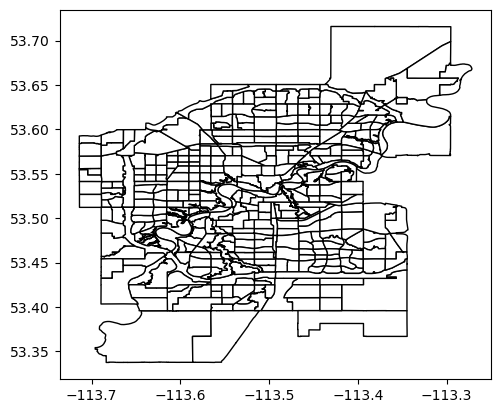

In [48]:
playg_map = hoods.plot(color='white', edgecolor='black', zorder=4)
playg.plot(ax=playg_map, color='red', markersize=5, zorder=1)

## Constructing Features

In predictive modelling, we often want to construct features that are useful for our model. We'll go over much more on what a feature is in the future, but geospatial based things like distance and size are often useful features that we can use as inputs to a model. 

We can construct features from our location data, what we want will vary depending on scenario. For example, we might want to know how far a school is from a bar, or how many corner stores are in one electoral district. We'll need to construct these features from our data, then replace the original data with the new features we've made. 

Some common things that we might want to construct are:
<ul>
<li> What region are you in - do a spatial join and attach the region label to the data. </li>
<li> How far are you from X - calculate the distance between two things. </li>
<li> How many of X are in Y - count the number of things in a region. </li>
</ul>

## Feature Construction Process

Each new feature that we want to make will be some kind of transformation of the original data, so we'll need to figure out some algorithm to calculate our new values. 

## More Efficient Construction

These kinds of universal 'prep' steps are common, and the type of action we need to take should tip you off that this is something that goes to all rows of the dataset. This is a good candidate for a function that we can apply to the entire dataset. In general, apply will process more efficiently than a loop, so we should use apply when we can, particularly with large datasets.

### Even More Efficient

We can build a tool that can apply these, or other, preparation steps to our data - in stream and automatically. This makes it way easier and is a common tool called a pipeline, which we'll look at next time. 

## Exercise - Construct Features

Try to construct a couple of features for this playground data. 

Features to add:
<ul>
<li> Distance from a set location. </li>
<li> Distance from the nearest bar. </li>
<li> Area of each region. </li>
</ul>